CODE 1161: Data Project

Rainfall in Centennial Park

collect & analyze the rainfalldata in Centnnial Park

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
from datetime import datetime

In [49]:
aus_poas = gp.read_file('aus_poas.shp')
#文件来自https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

In [50]:
def plot_australia():
    #拿到数据  google postcode 显示出来
    #红的中间
    #print("Australia's geographic information form")
    #print("https://spatialvision.com.au")

    aus_map = aus_poas.plot()
    #澳洲地图
    plt.xlabel('Longitude',fontsize = 15)
    plt.ylabel('Latitude',fontsize = 15)
    plt.title("Australia",fontsize = 15)

    nsw = aus_poas.query('code >= 2000 & code <= 2999')
    nsw_map = nsw.plot(ax=aus_map,color='green')
    #nsw地图

    around_centennial_park = aus_poas.query('code >= 2000 & code <= 2150')
    around_centennial_park.map = around_centennial_park.plot(ax=nsw_map,color='red')
    #centennial_park 附近地图 红

    return around_centennial_park.map

<AxesSubplot:title={'center':'Australia'}, xlabel='Longitude', ylabel='Latitude'>

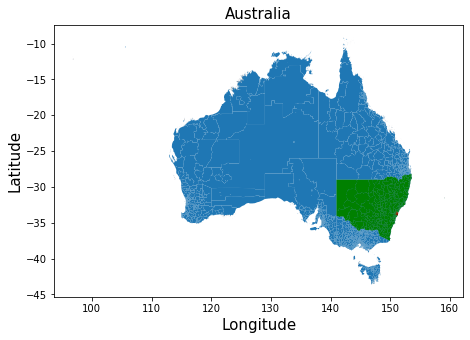

In [51]:
plot_australia()

Text(0.5, 1.0, 'Centennial Park')

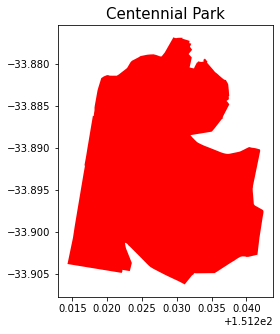

In [52]:
aus_poas.query('code == 2021').plot(color = 'red')
plt.title('Centennial Park',fontsize = 15)

In [53]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 5)

saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Collect and organize the rainfall data 

(data form: http://www.bom.gov.au/)

In [54]:
os.path.isfile("rainfall.csv")
filepath = 'rainfall.csv'
#print("load form the file")

centennial_park_rainfall = pd.read_csv(filepath)
#print("done")
#导入数据


In [55]:
centennial_park_rainfall.head(8)

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,66160,1900,1,1,NaN,NaN,NaN
1,IDCJAC0009,66160,1900,1,2,NaN,NaN,NaN
2,IDCJAC0009,66160,1900,1,3,NaN,NaN,NaN
3,IDCJAC0009,66160,1900,1,4,NaN,NaN,NaN
4,IDCJAC0009,66160,1900,1,5,NaN,NaN,NaN
5,IDCJAC0009,66160,1900,1,6,NaN,NaN,NaN
6,IDCJAC0009,66160,1900,1,7,NaN,NaN,NaN
7,IDCJAC0009,66160,1900,1,8,NaN,NaN,NaN


Year  Month  Day    -->    Date

1900   1     1     -->    1900-01-01

In [56]:
#合并日月年
#+下一条
centennial_park_rainfall["Date"] = centennial_park_rainfall['Year'].astype(str) + ('-' + centennial_park_rainfall['Month'].astype(str) ) + ('-' + centennial_park_rainfall['Day'].astype(str) )

#去掉无用
rainfall_data = centennial_park_rainfall[['Date','Rainfall amount (millimetres)']]


#日期 to index
#penalty_data3.set_index("Date")
centennial_park_rainfall.index = pd.DatetimeIndex(rainfall_data['Date'])

del rainfall_data['Date']

In [57]:
#合并日月年
#+下一条
centennial_park_rainfall["Date"] = centennial_park_rainfall['Year'].astype(str) + ('-' + centennial_park_rainfall['Month'].astype(str) ) + ('-' + centennial_park_rainfall['Day'].astype(str) )

#去掉无用
rainfall_data = centennial_park_rainfall[['Date','Rainfall amount (millimetres)']]


#日期 to index
centennial_park_rainfall.index = pd.DatetimeIndex(rainfall_data['Date'])

del rainfall_data['Date']
#不知道为什么 跑两次

In [58]:
#去掉未开张
rainfall_data = rainfall_data.loc['1900-6':'2021-6']
#rainfall_data.T
#90度

In [59]:
#索引  单年
penalty_data3_2020 = rainfall_data.loc['2020']

In [60]:
penalty_data3_2020

,Rainfall amount (millimetres)
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
...,...
2020-12-27,2.6
2020-12-28,0.0
2020-12-29,14.0


In [61]:
rainfall_data.loc['2020-01'].T

Date,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
Rainfall amount (millimetres),0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.8,0.0,0.0,...,0.2,0.0,5.0,1.4,0.2,0.0,0.0,0.0,0.0,0.0


Graphs and analyse 

In [62]:
def scatter_rainfall():
    x = np.arange(len(rainfall_data["Rainfall amount (millimetres)"]))
    y = rainfall_data["Rainfall amount (millimetres)"]

    plt.scatter(x,y,alpha = 0.6)

    plt.ylabel('Rainfall amount (millimetres)',{'size' : 15})
    plt.xlabel('Date',{'size' : 15})

    plt.title("Rainfall in Centennial Park",{'size':20})

    plt.xticks([0,10000,20000,30000,40000],["1900","1925","1950","1975","2000"])
    #plt.yticks([1,10,25,50],['Light','Moderate','Heavy','Violen'])
    y_ticks = np.arange(0, np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])+1, 20)
    plt.yticks(y_ticks)

    return plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

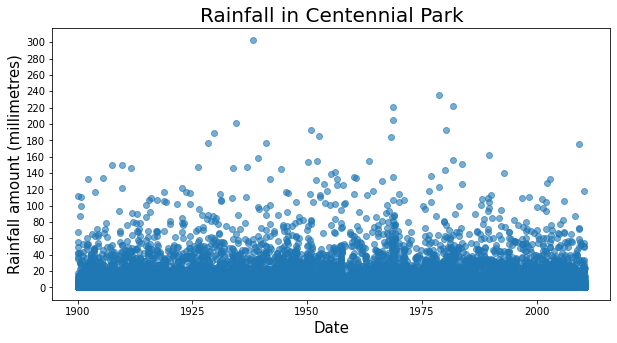

In [63]:
scatter_rainfall()

In [64]:
max_rainfall = np.max(centennial_park_rainfall["Rainfall amount (millimetres)"])
print("单日最高降雨（全数据）")
print(max_rainfall)

c = np.where(rainfall_data["Rainfall amount (millimetres)"] == max_rainfall)
d = centennial_park_rainfall["Date"][c[0][0]]
#print(c[0][0])
print("在这个时间")
print(d)

#全数据

单日最高降雨（全数据）
302.3
在这个时间
1941-10-28


In [65]:
def highest_rainfall():
    print('The highest rainfall happen in',d)
    print('Rainfall amount reached',max_rainfall,'mm')
    print("Violet rainday")


In [66]:
highest_rainfall()

The highest rainfall happen in 1941-10-28
Rainfall amount reached 302.3 mm
Violet rainday


In [67]:
wuyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] == 0])
#not rain
xiaoyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] < 10]) - wuyu
#light rain
baoyu= len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 50])
#Violen rain
dayu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 25]) - baoyu
#heavy rain
zhongyu = len(rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 10]) - baoyu - dayu
#moderate rain
typeyu = [xiaoyu,zhongyu,dayu,baoyu]
typeyu_lable = ['Light rain', 'Moderate rain', 'Heavy rain','Violet rain']

In [68]:
def distribution_of_rain_type():

    plt.figure(2, figsize=(6,6))
    #colors  = ['cyan','lightskyblue','steelblue','darkblue']
    explodes =(0.1,0,0,0)
    plt.pie(typeyu, explode=explodes, colors=None, labels=typeyu_lable, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('Distribution of Rain Type', bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(typeyu_lable,loc = 1)
    plt.show()
    plt.close()
#这是全年


Rainday      Light    Moderate    Heavy       Violet  

Rainfall    0 ~ 9.9   10 ~ 24.9   25 ~ 49.9    >=50
(millimetres)



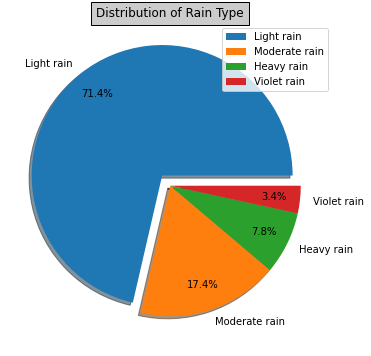

In [69]:
distribution_of_rain_type()

In [70]:
#大小中暴雨的天数  三雨折线图
#全数据

#暴雨天
baoyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 50]).groupby('Date')['Rainfall amount (millimetres)'].count()
baoyutiana = baoyutian.resample('Y').sum()
baoyutianaa = baoyutiana
#print(baoyutianaa)

#大 雨天
dayutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >= 25]).groupby('Date')['Rainfall amount (millimetres)'].count()
dayutiana = dayutian.resample('Y').sum() 
dayutianaa = dayutiana - baoyutiana
#print(dayutianaa)#这个才是

#中 雨天
zhongyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] >=10 ]).groupby('Date')['Rainfall amount (millimetres)'].count()
zhongyutiana = zhongyutian.resample('Y').sum() 
zhongyutianaa = zhongyutiana - dayutiana
#print(zhongyutianaa)#这个才是

#小 雨天
xiaoyutian = (rainfall_data[rainfall_data['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
xiaoyutiana = xiaoyutian.resample('Y').sum() 
xiaoyutianaa = xiaoyutiana - zhongyutiana
#print(xiaoyutianaa)#这个才是

In [71]:
def rainydays_year():
    xiaoyu = plt.plot(xiaoyutianaa)
    zhongyu = plt.plot(zhongyutianaa)
    dayu = plt.plot(dayutianaa)
    baoyu = plt.plot(baoyutianaa)

    plt.xlabel('Year')
    plt.ylabel("Days")
    plt.title('rainydays in year')
    plt.legend(typeyu_lable,loc = 1)



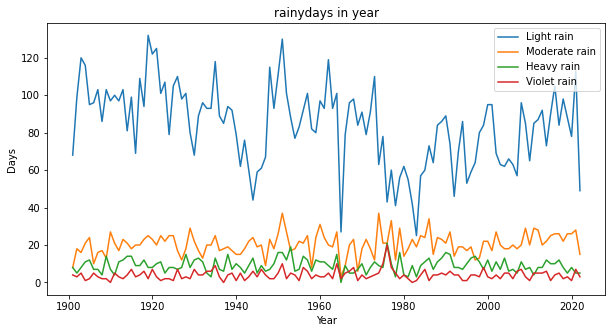

In [72]:
rainydays_year()

Consecutive Rainyday

In [28]:
def continuous_rainy_2020():

    data_2020_yue =rainfall_data.loc['2020']

    count = 1
    maxcount = 0
    for i in range(len(data_2020_yue['Rainfall amount (millimetres)'])-1):
        if (data_2020_yue['Rainfall amount (millimetres)'][i] > 0 ) & (data_2020_yue['Rainfall amount (millimetres)'][i+1] > 0):
            count = count + 1
            #print(count)
            if count > maxcount:
                maxcount = count
                index = i + 1
                maxindex = data_2020_yue['Rainfall amount (millimetres)'][i+1]
        else:
            count = 1   
    #print(index,maxcount,maxindex)


    kaishi = centennial_park_rainfall['Date']['2020'][index - maxcount +1]
    jiewei = centennial_park_rainfall['Date']['2020'][index]

    print('at lastyear, start form',kaishi,'it rains every day unitl',jiewei)
    print('It rained for',maxcount,'consecutive days')#肯 sir q tive days
    print('rainy every day in a week')


In [29]:
continuous_rainy_2020()

at lastyear, start form 2020-2-3 it rains every day unitl 2020-2-10
It rained for 8 consecutive days
rainy every day in a week


In [30]:
def continuous_rainy():    
    countall = 0
    maxcountall = 0
    for i in range(len(rainfall_data['Rainfall amount (millimetres)'])-1):
        if rainfall_data['Rainfall amount (millimetres)'][i] == 0:
            countall = 0
        elif rainfall_data['Rainfall amount (millimetres)'][i] > 0:
            countall = countall +1
            if countall > maxcountall:
                maxcountall = countall
                indexall = i 
                maxindexall = rainfall_data['Rainfall amount (millimetres)'][i]
                #maxindex应该无用
    #print(indexall,maxcountall,maxindexall)

    kaishiall = centennial_park_rainfall['Date'][indexall - maxcountall +1 +(31+28+31+30+31)]
    jieweiall = centennial_park_rainfall['Date'][indexall +(31+28+31+30+31)]

    #print(kaishiall,jieweiall,maxcountall)

    print('start form',kaishiall,'it rains every day unitl',jieweiall)
    print('It rained for',maxcountall,'consecutive days')#肯 sir q tive days
    print('rainy amounts a months')

In [31]:
continuous_rainy()

start form 1950-7-10 it rains every day unitl 1950-8-2
It rained for 24 consecutive days
rainy amounts a months


about last year (2020)

Spring      Setptember  October     November
Summer      December    January     February
Autumn      March       April       May
Winter      June        July        August

In [32]:
xiatian_2020 = rainfall_data.loc['2020-1':'2020-2'] 
xiatian_2020_12 =  (rainfall_data.loc['2020-12'])
#print(xiatian_2020,xiatian_2020_12)
#2020 夏
qiutian_2020 = rainfall_data.loc['2020-3':'2020-5']
#2020 秋
dongtian_2020 = rainfall_data.loc['2020-6':'2020-8']
#2020 冬
chuntian_2020 = rainfall_data.loc['2020-9':'2020-11']
#2020 春

In [33]:
def pie_seasons(labels,datas):
    
    plt.figure(1, figsize=(6,6))
   
    #expl = [0]
   
    colors  = ["blue","green","yellow","orange"]  #设置颜色（循环显示）
    #plt.shadow = True
    # Pie Plot
    # autopct: format of "percent" string;百分数格式
    plt.pie(datas, explode=None, colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('2020——rainfall in seasons', bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(labels,loc = 1)
    plt.show()
    #plt.savefig("pie.jpg")
    plt.close()
 
#四季  饼图

#夏》秋》冬》春

In [34]:
seasons_label   = ['Spr.','Sum.','Aut.','Win.']
#datas  每个季节 总共降水量
datas   = [np.sum(chuntian_2020)[0], np.sum(xiatian_2020)[0] + np.sum(xiatian_2020_12)[0], np.sum(qiutian_2020)[0], np.sum(dongtian_2020)[0]]

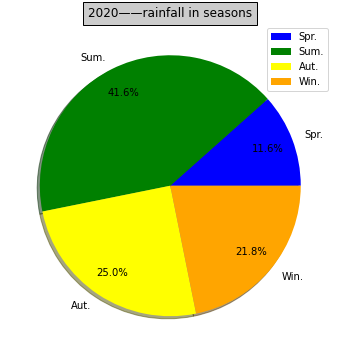

In [35]:
pie_seasons(seasons_label,datas)

In [36]:
def draw_pie_month(label_months,data_months):
    #12个月  版本  饼图
    plt.figure(2, figsize=(6,6))
    colors  = ['cornflowerblue',"blue",'royalblue','forestgreen','green','lime','khaki','yellow','gold','y',"orange",'lightcoral']
    plt.pie(data_months, explode=None, colors=colors, labels=labels_months, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.title('2020——rainfall in months', bbox={'facecolor':'0.8', 'pad':5})
    plt.legend(labels_months,loc = 1)
    plt.show()
    plt.close()
 

#12月分  饼图

In [37]:
labels_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

In [38]:
#这个调到前面
data_2020_yue =rainfall_data.loc['2020']
#年 分
wenhao2= data_2020_yue.index.month
# 看看索引
wenhao3 = data_2020_yue.resample('M').sum()
# 各个 求和  M为月
#实验  年份分类
wenhao4 = wenhao3['Rainfall amount (millimetres)']
print(wenhao4[8])

wenhao5 = []
for i in range(12):
    wenhao5 = wenhao5 + [wenhao4[i]]

print(wenhao5)

wenhao7 = wenhao5[8:10] + wenhao5[0:8] +wenhao5[10:12]
print(wenhao7)
#改变位置  排序  春夏秋冬

data_months   = wenhao7


30.400000000000002
[64.80000000000001, 431.5, 179.40000000000003, 37.699999999999996, 148.2, 111.6, 108.9, 98.3, 30.400000000000002, 72.5, 66.19999999999999, 111.29999999999998]
[30.400000000000002, 72.5, 64.80000000000001, 431.5, 179.40000000000003, 37.699999999999996, 148.2, 111.6, 108.9, 98.3, 66.19999999999999, 111.29999999999998]


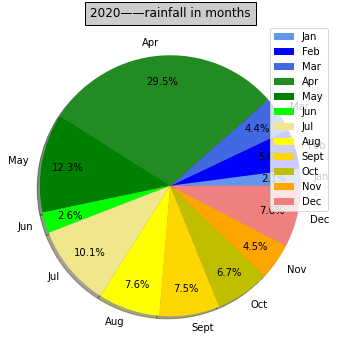

In [39]:
draw_pie_month(labels_months,data_months)


In [40]:
#c = data_2020_yue.resample('M').sum()
#每个月 降雨天数
c = (data_2020_yue[data_2020_yue['Rainfall amount (millimetres)'] > 0]).groupby('Date')['Rainfall amount (millimetres)'].count()
cc = c.resample('M').sum()
#print(c)
#[31,28,31,30,31,30,31，31，30，31，30，31]
#月份 天速
year = 2020
if int(year/4) == float(year/4):
    days_in_month = [31,29,31,30,31,30,31,31,30,31,30,31]
else:
    days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

ccc = cc/days_in_month
print(np.mean(ccc))

0.41819923371647505


In [46]:
def rainy_in_2020():
#labels_months  1~12
#days_in_month 31，28，31

    otherday = days_in_month - cc
    #print(otherday)
    plt.bar(range(len(otherday)),days_in_month,label = 'no rain',fc = 'snow',ec='black', ls='-', lw=0.5,tick_label = labels_months)
    plt.bar(range(len(otherday)),cc,label = 'rainy',fc = 'silver',ec='k', lw=0.5, hatch='/')
    for a,b in zip(np.arange(len(labels_months)),cc):   #柱子上的数字显示
        plt.text(a,b,'%.2d'%b,ha='center',va='bottom',fontsize=10)
    for a,b in zip(np.arange(len(labels_months)),days_in_month):   #柱子上的数字显示
        plt.text(a,b,'%.2d'%b,ha='center',va='bottom',fontsize=10)

    plt.yticks([])
    plt.xlabel("month",fontsize = 15)

    plt.legend()
    plt.show

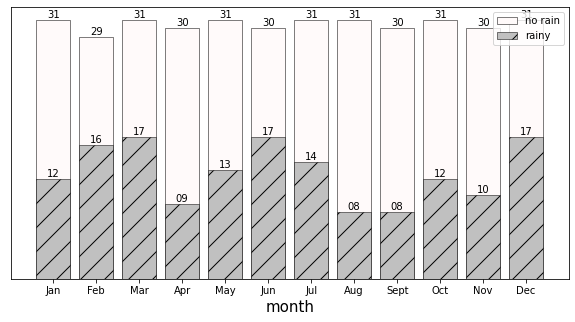

In [48]:
rainy_in_2020()

In [49]:
def rainfall_in_month():
    #每个月降雨量  条状  #1月示例
    tiaozhuang = data_2020_yue.loc['2020-08']["Rainfall amount (millimetres)"]
    plt.bar(range(len(tiaozhuang)),tiaozhuang,fc = 'silver',ec='k')
    plt.ylabel("Rainfall (millimetres",fontsize = 15)
    plt.xlabel('Aug',fontsize =15)

In [43]:
def rainydays_2020():
    print(np.mean(ccc))

In [44]:
rainydays_2020()

0.41819923371647505


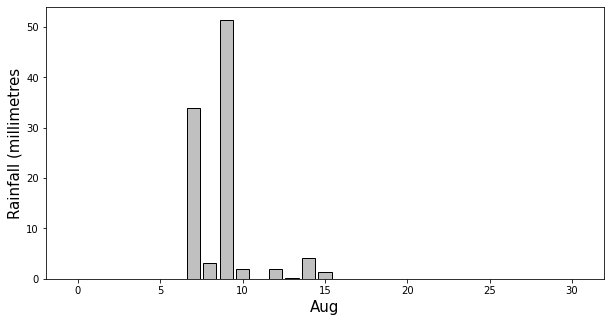

In [50]:
rainfall_in_month()

Thanks